<a href="https://colab.research.google.com/github/sajjadhaghighat/NeuralNetwork/blob/master/HW5_Datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score, silhouette_score

In [2]:
iris = pd.read_csv("iris.data")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [3]:
y = iris.iloc[:,-1]
y.replace(to_replace='Iris-setosa', value=0, inplace=True)
y.replace(to_replace='Iris-versicolor',  value=1, inplace=True)
y.replace(to_replace='Iris-virginica',  value=2, inplace=True)

In [4]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [6]:
def Sepal_cluster(data , predict, algorithm):
  plt.scatter(data[:,0], data[:,1], c=predict)
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.title(algorithm+' clusters')

In [7]:
def Petal_cluster(data , predict, algorithm):
  plt.scatter(data[:,2], data[:,3], c=predict)
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.title(algorithm+' clusters')

In [8]:
def plot_actual_prediction_iris(X, Y, Y_preds, attr):
    a1 = 2
    a2 = 3
    if attr == 'Sepal':
      a1 = 0
      a2 = 1
    with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(14,5))

        plt.subplot(1,2,1)
        plt.scatter(X[Y==0,a1],X[Y==0,a2], c = 'red',  s=50)
        plt.scatter(X[Y==1,a1],X[Y==1,a2], c = 'green',  s=50)
        plt.scatter(X[Y==2,a1],X[Y==2,a2], c = 'blue',  s=50)
        plt.title("Original Data")
        plt.xlabel(attr+' Length')
        plt.ylabel(attr+' Width')

        plt.subplot(1,2,2)
        plt.scatter(X[Y_preds==0,a1],X[Y_preds==0,a2], c = 'red',  s=50)
        plt.scatter(X[Y_preds==1,a1],X[Y_preds==1,a2], c = 'green',  s=50)
        plt.scatter(X[Y_preds==2,a1],X[Y_preds==2,a2], c = 'blue',  s=50)
        plt.xlabel(attr+' Length')
        plt.ylabel(attr+' Width')
        plt.title("Clustering Algorithm Prediction");

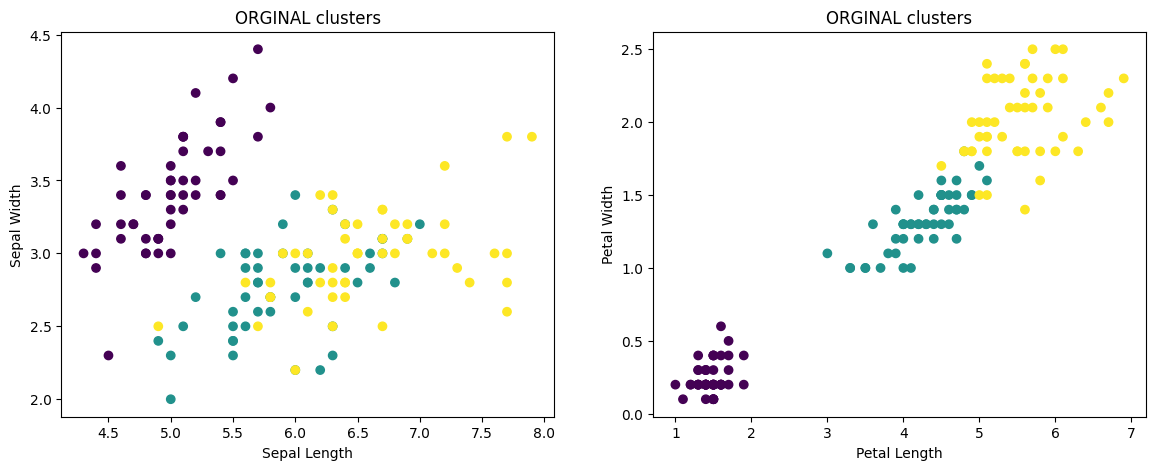

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
Sepal_cluster(x,y,"ORGINAL")
plt.subplot(1,2,2)
Petal_cluster(x,y,"ORGINAL")

# KMeans روش

بهینه k جهت پیدا کردن  elbow روش


In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

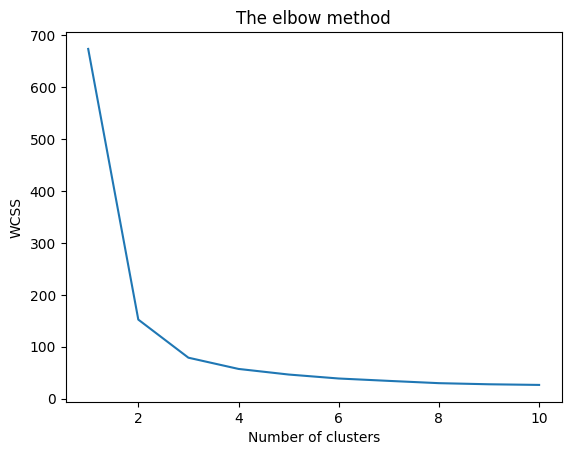

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(kmeans.cluster_centers_) #display cluster centers

[[5.00408163 3.41632653 1.46530612 0.24489796]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [13]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2
 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2
 1]


adjusted_rand_score 0.7266293901799755
silhouette_score 0.5501981391949842


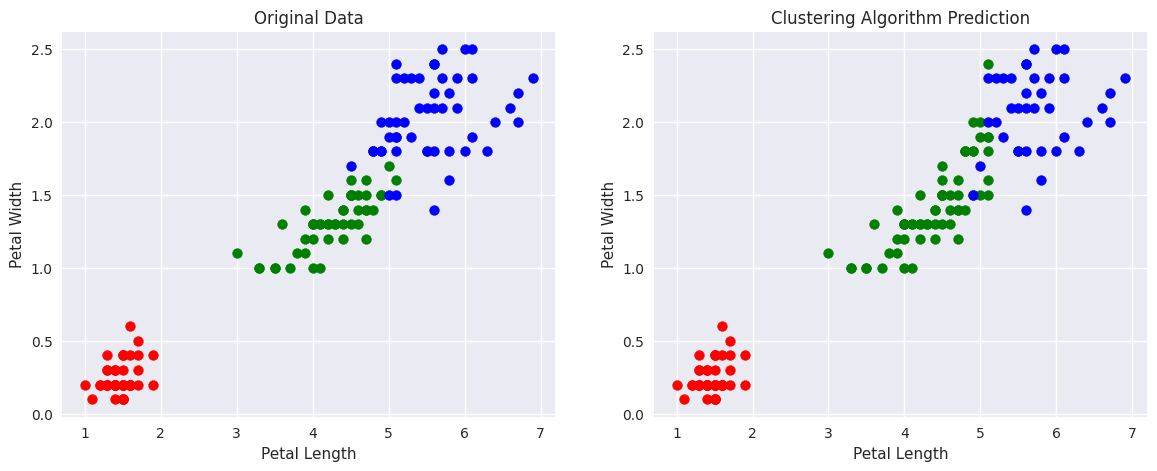

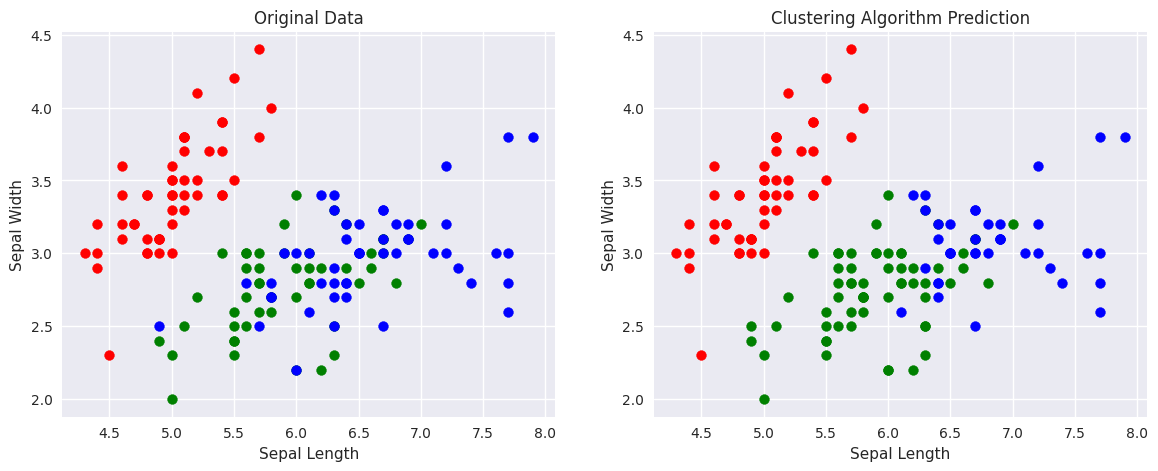

In [14]:
plot_actual_prediction_iris(x, y, y_kmeans, 'Petal')
plot_actual_prediction_iris(x, y, y_kmeans, 'Sepal')
print("adjusted_rand_score", adjusted_rand_score(y, y_kmeans))
print("silhouette_score", silhouette_score(x, y_kmeans))

# DBSCAN روش

### min_max نرمال سازی

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x)
print(X_train_minmax[1:5,:])

[[0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]]


### ماتریس شباهت براساس فاصله اقلیدسی

In [16]:
euclidean_distances = np.sqrt(((X_train_minmax[:, np.newaxis] - X_train_minmax) ** 2).sum(axis=2))
print(euclidean_distances)

[[0.         0.10157824 0.09469862 ... 1.08390691 1.17619813 0.95649502]
 [0.10157824 0.         0.06047157 ... 1.12088708 1.19544459 0.98859665]
 [0.09469862 0.06047157 0.         ... 1.11178383 1.18984212 0.97410913]
 ...
 [1.08390691 1.12088708 1.11178383 ... 0.         0.226928   0.18710825]
 [1.17619813 1.19544459 1.18984212 ... 0.226928   0.         0.28409587]
 [0.95649502 0.98859665 0.97410913 ... 0.18710825 0.28409587 0.        ]]


In [17]:
euclidean_distances.max()

1.65118740089812

In [18]:
euclidean_distances.min()

0.0

### یادگیری مدل

In [19]:
from sklearn.cluster import DBSCAN

def dbscan_method(e,minp):
  dbscan = DBSCAN(eps=e, min_samples=minp)
  y_pred = dbscan.fit_predict(x)
  return y_pred

In [20]:
y_db= dbscan_method(0.4,4)

In [21]:
print(y_db)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  1  1  1  1  1  1  1  3  1  1  3  1 -1  1 -1  1  1  1 -1  1  2  1  2
  1  1  1  1  1  1  1  1  1  1  2  1 -1  1 -1  1  1  1  1  1  3  1  1  1
  1  3  1 -1  2  2  2  2 -1 -1 -1 -1 -1  2  2  2  2 -1  2  2 -1 -1 -1  2
  2 -1  2  2 -1  2  2  2 -1 -1 -1  2  2 -1 -1  2  2  2  2  2  2  2  2  2
  2  2  2  2  2]


adjusted_rand_score 0.680265071351722
silhouette_score 0.32130050158203083


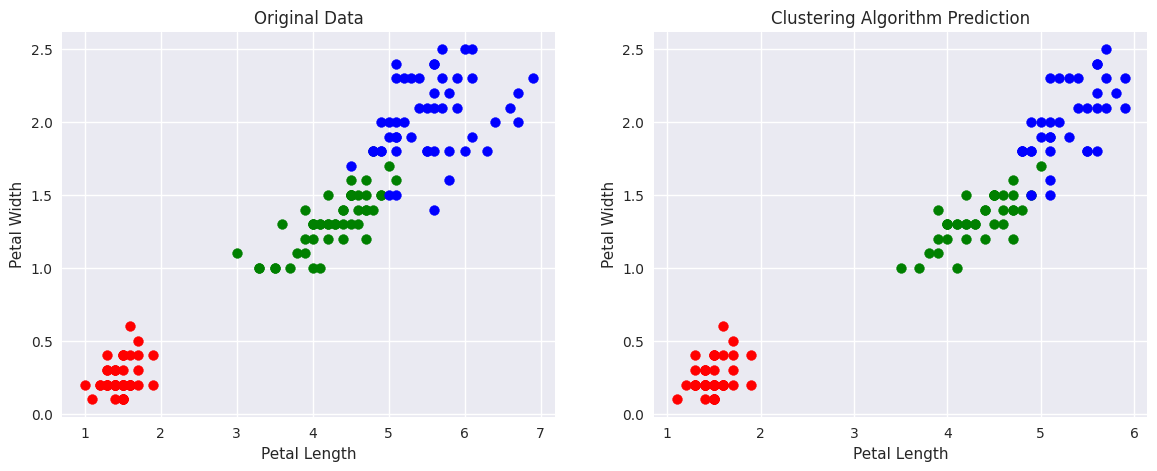

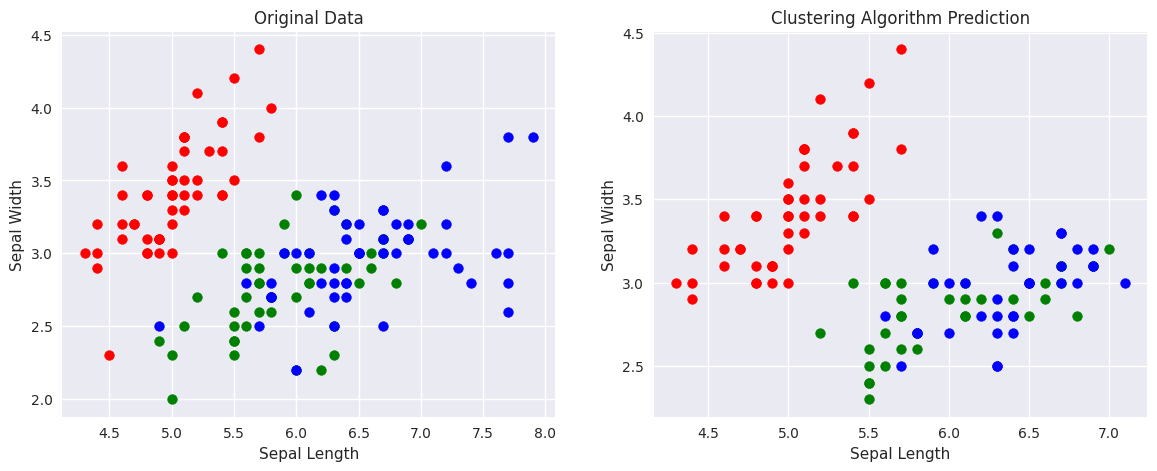

In [22]:
plot_actual_prediction_iris(x, y, y_db, 'Petal')
plot_actual_prediction_iris(x, y, y_db, 'Sepal')
print("adjusted_rand_score", adjusted_rand_score(y, y_db))
print("silhouette_score", silhouette_score(x, y_db))

In [23]:

for f in np.arange(0.1,1.6,0.1):
  for g in range(2,10):
    print(round(f,1),g)
    try:
      y_db = dbscan_method(round(f,1),g)
      print("adjusted_rand_score", adjusted_rand_score(y, y_db))
    except:
      print("-------------------------------------------------------------")
    print("-------------------------------------------------------------")


0.1 2
adjusted_rand_score 0.002877013386103949
-------------------------------------------------------------
0.1 3
adjusted_rand_score 0.0016662624437405
-------------------------------------------------------------
0.1 4
adjusted_rand_score 0.0
-------------------------------------------------------------
0.1 5
adjusted_rand_score 0.0
-------------------------------------------------------------
0.1 6
adjusted_rand_score 0.0
-------------------------------------------------------------
0.1 7
adjusted_rand_score 0.0
-------------------------------------------------------------
0.1 8
adjusted_rand_score 0.0
-------------------------------------------------------------
0.1 9
adjusted_rand_score 0.0
-------------------------------------------------------------
0.2 2
adjusted_rand_score 0.06178324151679492
-------------------------------------------------------------
0.2 3
adjusted_rand_score 0.0714813106724432
-------------------------------------------------------------
0.2 4
adjusted_ra